In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = \
        imdb.load_data(num_words=10000)



/home/ma/.bin/anaconda3/envs/tensor/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ma/.bin/anaconda3/envs/tensor/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
import numpy as np


In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results


In [4]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])


In [7]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [8]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val ))


Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5918 - binary_accuracy: 0.6459 - val_loss: 0.5282 - val_binary_accuracy: 0.8111
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4666 - binary_accuracy: 0.8580 - val_loss: 0.4600 - val_binary_accuracy: 0.8692
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3544 - binary_accuracy: 0.9182 - val_loss: 0.3395 - val_binary_accuracy: 0.8817
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2259 - binary_accuracy: 0.9361 - val_loss: 0.2871 - val_binary_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1672 - binary_accuracy: 0.9509 - val_loss: 0.2877 - val_binary_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1328 - binary_accuracy: 0.9581 - val_loss: 0.2934 - val_binary_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - los

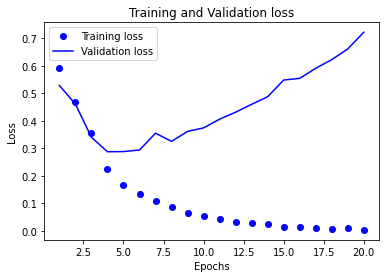

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


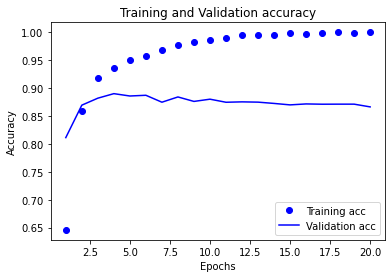

In [13]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)



Epoch 1/4
49/49 [==============================] - 0s 10ms/step - loss: 0.4704 - accuracy: 0.8158
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2663 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2034 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2927 - accuracy: 0.8848


In [15]:
results

[0.29266539216041565, 0.8847600221633911]

In [7]:
dd = ['a', 'b','c','d','e','f','j','g','g']
ee = [1,2,3,4,5,6,7,7,7,7,8,0]

In [8]:
vectorize_sequences(ee)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
re = np.zeros(len(dd, 100)
for i, j in enumerate(dd):
    re[i,j] = 1.

SyntaxError: invalid syntax (<ipython-input-15-8f9139b09ab7>, line 2)

In [16]:
re

NameError: name 're' is not defined

In [18]:
re = np.zeros((len(dd), 1000))

In [19]:
re

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
re[0,0] = 1

In [22]:
re[1,1] = 1

In [23]:
re

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])